In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.shape

(200, 5)

In [4]:
df.drop('CustomerID',inplace=True,axis=1)

In [5]:
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [11]:
#lets encode the Genre column
df1 = df
from sklearn.preprocessing import LabelEncoder
df1['Genre'] = LabelEncoder().fit_transform(df1['Genre'])
df1.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [13]:
df1.columns

Index(['Genre', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [15]:
#scaling the features
from sklearn.preprocessing import StandardScaler
df1 = StandardScaler().fit_transform(df1)
df1

array([[ 1.12815215, -1.42456879, -1.73899919, -0.43480148],
       [ 1.12815215, -1.28103541, -1.73899919,  1.19570407],
       [-0.88640526, -1.3528021 , -1.70082976, -1.71591298],
       [-0.88640526, -1.13750203, -1.70082976,  1.04041783],
       [-0.88640526, -0.56336851, -1.66266033, -0.39597992],
       [-0.88640526, -1.20926872, -1.66266033,  1.00159627],
       [-0.88640526, -0.27630176, -1.62449091, -1.71591298],
       [-0.88640526, -1.13750203, -1.62449091,  1.70038436],
       [ 1.12815215,  1.80493225, -1.58632148, -1.83237767],
       [-0.88640526, -0.6351352 , -1.58632148,  0.84631002],
       [ 1.12815215,  2.02023231, -1.58632148, -1.4053405 ],
       [-0.88640526, -0.27630176, -1.58632148,  1.89449216],
       [-0.88640526,  1.37433211, -1.54815205, -1.36651894],
       [-0.88640526, -1.06573534, -1.54815205,  1.04041783],
       [ 1.12815215, -0.13276838, -1.54815205, -1.44416206],
       [ 1.12815215, -1.20926872, -1.54815205,  1.11806095],
       [-0.88640526, -0.

In [16]:
len(df),len(df1)

(200, 200)

In [18]:
#KMeans
from sklearn.cluster import KMeans

In [21]:
#calculating wcc value for different k values
wcss=[]
for i in range(1,10):
    model = KMeans(n_clusters=i,random_state=42,init='k-means++',n_init='auto')
    model.fit(df1)
    wcss.append(model.inertia_)

C:\Users\Prince\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Prince\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Prince\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Prince\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Wi

In [22]:
wcss

[800.0000000000002,
 588.8026767824938,
 501.89715860563666,
 412.249317379467,
 335.31419122822115,
 291.3960724895504,
 236.20494707086885,
 199.71662559667675,
 192.7896051713307]

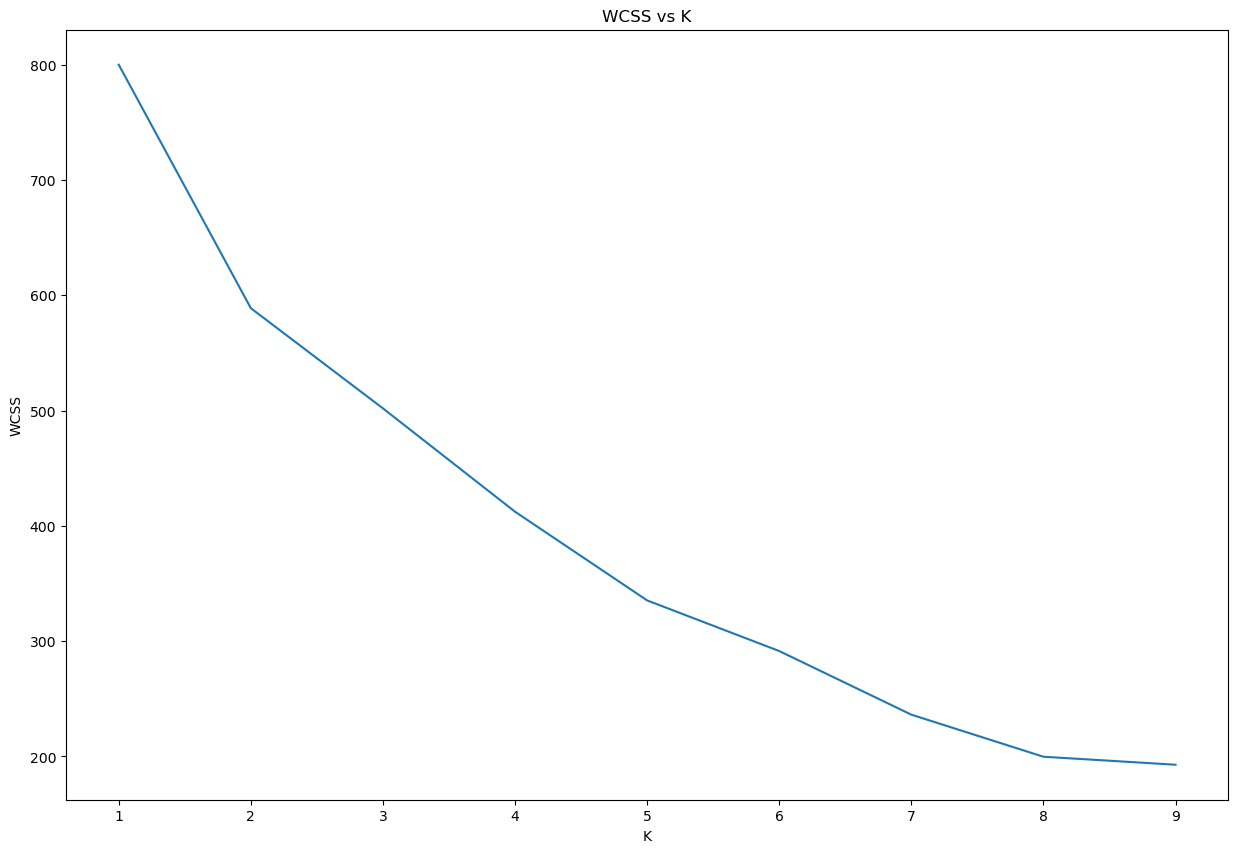

In [24]:
k_value = [i for i in range(1,10)]
plt.figure(figsize = (15,10))
plt.plot(k_value,wcss)
plt.title('WCSS vs K')
plt.ylabel('WCSS')
plt.xlabel('K')
plt.show()

- By looking at the graph optimal value of k looks to be 8

In [25]:
# Training the model
model_final = KMeans(n_clusters=8)
model_final.fit(df1)
y_pred = model_final.predict(df1)
y_pred

C:\Users\Prince\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Prince\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([2, 2, 6, 2, 6, 2, 6, 2, 0, 2, 0, 2, 3, 2, 0, 2, 6, 2, 0, 2, 0, 2,
       3, 2, 3, 2, 3, 2, 6, 2, 0, 2, 0, 2, 3, 2, 3, 2, 6, 2, 3, 2, 0, 6,
       3, 6, 3, 6, 6, 6, 3, 4, 6, 0, 3, 0, 3, 0, 6, 0, 0, 4, 3, 3, 0, 4,
       3, 3, 4, 6, 0, 3, 3, 3, 0, 4, 3, 0, 6, 3, 0, 4, 0, 3, 6, 0, 3, 6,
       6, 3, 3, 4, 0, 6, 6, 4, 3, 6, 0, 4, 6, 3, 0, 4, 0, 6, 3, 0, 0, 0,
       0, 6, 6, 4, 6, 6, 3, 3, 3, 3, 4, 6, 6, 4, 6, 1, 5, 4, 0, 4, 5, 4,
       6, 1, 5, 1, 7, 4, 5, 1, 7, 4, 6, 1, 5, 4, 5, 1, 7, 4, 5, 4, 7, 1,
       7, 1, 5, 1, 5, 1, 7, 1, 5, 1, 5, 1, 5, 1, 7, 4, 5, 4, 5, 4, 7, 1,
       5, 4, 5, 4, 7, 1, 5, 1, 7, 4, 7, 4, 7, 1, 7, 1, 5, 1, 7, 1, 7, 4,
       5, 4])

In [26]:
model_final.cluster_centers_

array([[ 1.12815215,  1.27534357, -0.51626127, -0.43346281],
       [-0.88640526, -0.47793198,  0.97284787,  1.22158511],
       [ 0.02930265, -0.99070653, -1.37118469,  1.08629785],
       [-0.88640526,  1.01325595, -0.47702244, -0.2952865 ],
       [ 1.12815215, -0.66862633,  0.52953721,  0.80619441],
       [ 1.12815215, -0.02700694,  0.96701244, -1.39716754],
       [-0.88640526, -0.72484357, -0.38994843, -0.26617033],
       [-0.88640526,  0.41265847,  1.21277   , -1.11029664]])

In [29]:
!pip install yellowbrick

     -------------------------------------- 282.6/282.6 kB 4.4 MB/s eta 0:00:00


C:\Users\Prince\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Prince\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Prince\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Prince\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the envir

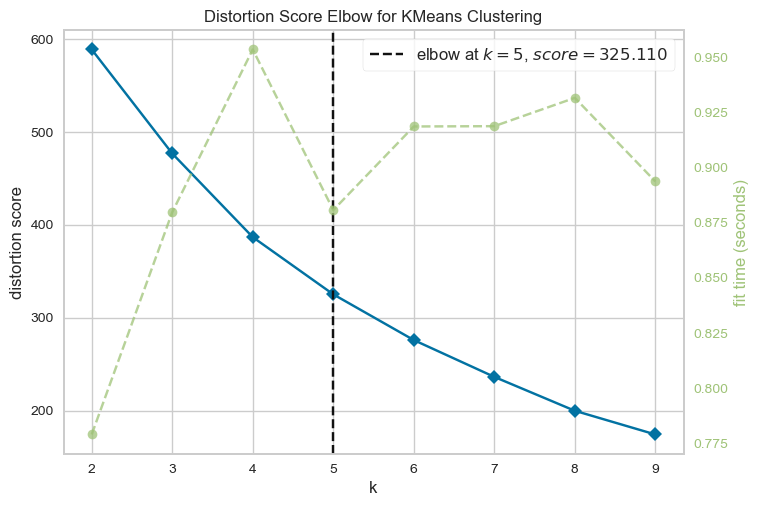

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [34]:
from yellowbrick.cluster import KElbowVisualizer
km = KMeans(random_state=42)
visualizer = KElbowVisualizer(km,k=(2,10),n_init=10)
visualizer.fit(df1)
visualizer.show()

- As per this graph the optimum value of k is supposed to be 5

In [37]:
y_pred

array([2, 2, 6, 2, 6, 2, 6, 2, 0, 2, 0, 2, 3, 2, 0, 2, 6, 2, 0, 2, 0, 2,
       3, 2, 3, 2, 3, 2, 6, 2, 0, 2, 0, 2, 3, 2, 3, 2, 6, 2, 3, 2, 0, 6,
       3, 6, 3, 6, 6, 6, 3, 4, 6, 0, 3, 0, 3, 0, 6, 0, 0, 4, 3, 3, 0, 4,
       3, 3, 4, 6, 0, 3, 3, 3, 0, 4, 3, 0, 6, 3, 0, 4, 0, 3, 6, 0, 3, 6,
       6, 3, 3, 4, 0, 6, 6, 4, 3, 6, 0, 4, 6, 3, 0, 4, 0, 6, 3, 0, 0, 0,
       0, 6, 6, 4, 6, 6, 3, 3, 3, 3, 4, 6, 6, 4, 6, 1, 5, 4, 0, 4, 5, 4,
       6, 1, 5, 1, 7, 4, 5, 1, 7, 4, 6, 1, 5, 4, 5, 1, 7, 4, 5, 4, 7, 1,
       7, 1, 5, 1, 5, 1, 7, 1, 5, 1, 5, 1, 5, 1, 7, 4, 5, 4, 5, 4, 7, 1,
       5, 4, 5, 4, 7, 1, 5, 1, 7, 4, 7, 4, 7, 1, 7, 1, 5, 1, 7, 1, 7, 4,
       5, 4])

In [35]:
model_final.labels_

array([7, 7, 8, 1, 8, 1, 8, 1, 3, 1, 3, 1, 8, 1, 3, 7, 8, 7, 3, 1, 7, 7,
       8, 7, 8, 7, 8, 7, 8, 1, 3, 1, 3, 7, 8, 1, 8, 1, 8, 1, 6, 7, 3, 1,
       8, 1, 6, 1, 1, 1, 6, 7, 1, 3, 6, 3, 6, 3, 1, 3, 3, 7, 6, 6, 3, 7,
       6, 6, 7, 1, 3, 6, 6, 6, 3, 7, 6, 3, 1, 6, 3, 7, 3, 6, 1, 3, 6, 1,
       1, 6, 6, 7, 3, 6, 1, 7, 6, 1, 3, 7, 1, 6, 3, 7, 3, 1, 6, 3, 3, 3,
       3, 1, 0, 7, 1, 1, 6, 6, 6, 6, 7, 0, 6, 2, 0, 4, 5, 2, 3, 2, 5, 2,
       0, 4, 5, 4, 0, 2, 5, 4, 0, 2, 0, 4, 5, 2, 5, 4, 0, 2, 5, 2, 0, 4,
       0, 4, 5, 4, 5, 4, 6, 4, 5, 4, 5, 4, 5, 4, 0, 2, 5, 2, 5, 2, 0, 4,
       5, 2, 5, 2, 0, 4, 5, 4, 0, 2, 0, 2, 0, 4, 0, 4, 5, 4, 0, 4, 0, 2,
       5, 2])

In [40]:
#Lets check the silhouette visualizer also here
from sklearn.metrics import silhouette_score
sil= []
for i in range(2,10):
    km = KMeans(n_clusters=i)
    km.fit(df1)
    silhouetter_avg = silhouette_score(df1,km.labels_)
    sil.append(silhouetter_avg)

C:\Users\Prince\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Prince\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Prince\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Prince\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the envir

In [41]:
sil

[0.25181529157884364,
 0.26135746780821956,
 0.30123231688013513,
 0.31708403088223436,
 0.3194799263987778,
 0.3624845307525999,
 0.38738083581583793,
 0.4022780584999401]

- As per the sihouette score it seems k =  seems to be the best